<a href="https://colab.research.google.com/github/namra98/Deep-Learning/blob/master/LeNet_5_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This NoteBook contains Implementation of one of the early CNN : **LeNet-5**

> Paper can be found here : http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

> This gets **97.68 %** accuracy on MNIST Dataset

![alt text](https://raw.githubusercontent.com/mbadry1/DeepLearning.ai-Summary/master/4-%20Convolutional%20Neural%20Networks/Images/05.png)




In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import optimizers
from sklearn.metrics import accuracy_score
from keras.optimizers import SGD
from keras.datasets import cifar10
from keras import backend as K
import keras



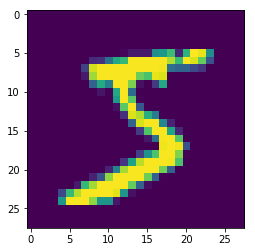

In [0]:
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

plt.imshow(X_train[0,:,:])

In [0]:
if K.image_data_format() == 'channels_first':
  X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2])
  X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2])
  input_shape = (1, X_test.shape[1], X_test.shape[2])
else:
  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
  input_shape = (X_test.shape[1], X_test.shape[2], 1)

print(input_shape)

(28, 28, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = (X_train / 255) - 0.5
X_test = (X_test / 255) - 0.5

Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

In [0]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5)))
model.add(keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(16, kernel_size=(5, 5)))
model.add(keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=128, epochs=12, validation_data=(X_test, Y_test))
model.evaluate(X_test, Y_test)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 20s 342us/step - loss: 0.3153 - acc: 0.9012 - val_loss: 0.1465 - val_acc: 0.9529
Epoch 2/12
60000/60000 [==============================] - 20s 327us/step - loss: 0.1233 - acc: 0.9620 - val_loss: 0.1054 - val_acc: 0.9665
Epoch 3/12
60000/60000 [==============================] - 20s 329us/step - loss: 0.0935 - acc: 0.9707 - val_loss: 0.0977 - val_acc: 0.9694
Epoch 4/12
60000/60000 [==============================] - 20s 331us/step - loss: 0.0786 - acc: 0.9759 - val_loss: 0.0923 - val_acc: 0.9710
Epoch 5/12
60000/60000 [==============================] - 20s 330us/step - loss: 0.0690 - acc: 0.9781 - val_loss: 0.0878 - val_acc: 0.9751
Epoch 6/12
60000/60000 [==============================] - 20s 329us/step - loss: 0.0607 - acc: 0.9808 - val_loss: 0.0835 - val_acc: 0.9735
Epoch 7/12
60000/6000

[0.09302106323444677, 0.9768]